### Assignment

In this project, you will visualize and make calculations from medical examination data using matplotlib, seaborn, and pandas. The dataset values were collected during medical examinations.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Tasks

Create a chart similar to examples/Figure_1.png, where we show the counts of good and bad outcomes for the cholesterol, gluc, alco, active, and smoke variables for patients with cardio=1 and cardio=0 in different panels.

In [2]:
df= pd.read_csv('medical_examination.csv')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
df['cholesterol'].unique()

array([1, 3, 2])

In [4]:
df['gluc'].unique()

array([1, 2, 3])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [4]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349843,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.477253,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,3.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
#change the 'age' column to years
#df['age'] = round(df['age']/365.25,0)

In [6]:
#change 'height' column to meters

#df['height'] = df['height']/100

In [7]:
# Add 'overweight' column

df['overweight'] = np.where((df['weight']/np.square(df['height']/100))> 25, 1, 0)
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,50.0,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,55.0,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,52.0,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,48.0,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,48.0,1,156,56.0,100,60,1,1,0,0,0,0,0


In [8]:
#overweight = (df['weight'] / ((df['height'] / 100)**2) > 25).astype(int)
#print(overweight)
#df['overweight'] = overweight
#df.head()

In [9]:
# Normalize data by making 0 always good and 1 always bad. 
#If the value of 'cholestorol' or 'gluc' is 1, make the value 0. 
#If the value is more than 1, make the value 1.

df['cholesterol'] = np.where(df['cholesterol']== 1, 0, 1)
df['gluc'] = np.where(df['gluc']== 1, 0, 1)
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,50.0,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,55.0,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,52.0,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,48.0,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,48.0,1,156,56.0,100,60,0,0,0,0,0,0,0


In [10]:
# Create DataFrame for cat plot using `pd.melt` 
#using just the values from 'cholesterol', 'gluc', 
#'smoke', 'alco', 'active', and 'overweight'.


#df_cat = pd.melt(df,value_vars=['cholesterol', 'gluc', 'smoke', 'alco','active', 'overweight'])
#df_cat.head()

In [11]:
df_cat = pd.melt(df,id_vars=['cardio'],value_vars=['cholesterol', 'gluc', 'smoke', 'alco','active', 'overweight'])
df_cat.head()

,cardio,variable,value
0,0,cholesterol,0
1,1,cholesterol,1
2,1,cholesterol,1
3,1,cholesterol,0
4,0,cholesterol,0


In [12]:
df_cat = pd.DataFrame(df_cat.groupby(['cardio', 'variable', 'value'])['value'].count())
df_cat

value
cardio variable    value       
0      active      0       6378
                   1      28643
       alco        0      33080
                   1       1941
       cholesterol 0      29330
                   1       5691
       gluc        0      30894
                   1       4127
       overweight  0      15915
                   1      19106
       smoke       0      31781
                   1       3240
1      active      0       7361
                   1      27618
       alco        0      33156
                   1       1823
       cholesterol 0      23055
                   1      11924
       gluc        0      28585
                   1       6394
       overweight  0      10539
                   1      24440
       smoke       0      32050
                   1       2929

In [13]:
#Rename 'value' column
df_cat.rename(columns={"value": "total"}, inplace=True)
df_cat

total
cardio variable    value       
0      active      0       6378
                   1      28643
       alco        0      33080
                   1       1941
       cholesterol 0      29330
                   1       5691
       gluc        0      30894
                   1       4127
       overweight  0      15915
                   1      19106
       smoke       0      31781
                   1       3240
1      active      0       7361
                   1      27618
       alco        0      33156
                   1       1823
       cholesterol 0      23055
                   1      11924
       gluc        0      28585
                   1       6394
       overweight  0      10539
                   1      24440
       smoke       0      32050
                   1       2929

In [14]:
df_cat = df_cat.reset_index()
df_cat

,cardio,variable,value,total
0,0,active,0,6378
1,0,active,1,28643
2,0,alco,0,33080
3,0,alco,1,1941
4,0,cholesterol,0,29330
5,0,cholesterol,1,5691
6,0,gluc,0,30894
7,0,gluc,1,4127
8,0,overweight,0,15915
9,0,overweight,1,19106


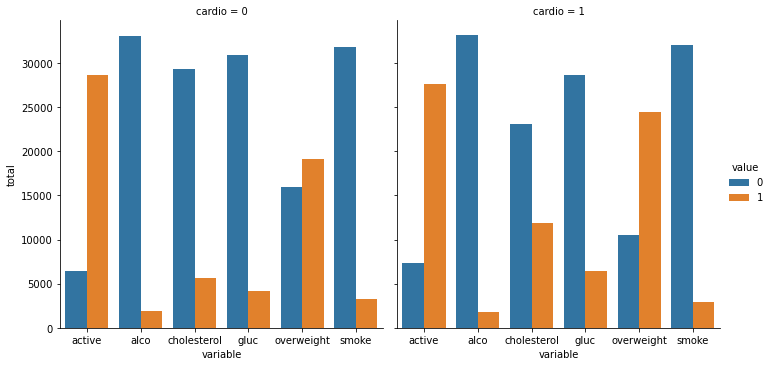

In [15]:

g= sns.catplot(data=df_cat, x="variable", y="total", hue="value", col='cardio', kind='bar')
fig = g.fig
plt.show()

#### Clean the Data

Filter out the following patient segments that represent incorrect data:
diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi']))

In [16]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,50.0,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,55.0,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,52.0,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,48.0,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,48.0,1,156,56.0,100,60,0,0,0,0,0,0,0


In [17]:
df_heat = df[(df['ap_lo'] <= df['ap_hi'])
                 & (df['height'] >= df['height'].quantile(0.025))
                 & (df['height'] <= df['height'].quantile(0.975))
                 & (df['weight'] >= df['weight'].quantile(0.025))
                 & (df['weight'] <= df['weight'].quantile(0.975))]


In [18]:
df_heat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63259 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           63259 non-null  int64  
 1   age          63259 non-null  float64
 2   gender       63259 non-null  int64  
 3   height       63259 non-null  int64  
 4   weight       63259 non-null  float64
 5   ap_hi        63259 non-null  int64  
 6   ap_lo        63259 non-null  int64  
 7   cholesterol  63259 non-null  int64  
 8   gluc         63259 non-null  int64  
 9   smoke        63259 non-null  int64  
 10  alco         63259 non-null  int64  
 11  active       63259 non-null  int64  
 12  cardio       63259 non-null  int64  
 13  overweight   63259 non-null  int64  
dtypes: float64(2), int64(12)
memory usage: 7.2 MB


* height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))



* height is more than the 97.5th percentile

* weight is less than the 2.5th percentile

* weight is more than the 97.5th percentile

In [25]:
corr = df_heat.corr()
corr

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,1.000000,0.002145,0.003426,0.000326,0.000149,0.003492,0.000484,0.003719,0.002289,-0.002732,-0.000708,0.005891,0.003900,-0.000679
age,0.002145,1.000000,-0.018168,-0.076772,0.070095,0.018370,0.153403,0.129986,0.086620,-0.044450,-0.027068,-0.011350,0.239916,0.089536
gender,0.003426,-0.018168,1.000000,0.505785,0.129979,0.005063,0.059947,-0.037605,-0.021357,0.337436,0.168637,0.007864,0.002320,-0.052930
height,0.000326,-0.076772,0.505785,1.000000,0.251503,0.004586,0.017922,-0.063522,-0.030469,0.187830,0.089785,-0.005661,-0.024102,-0.149570
weight,0.000149,0.070095,0.129979,0.251503,1.000000,0.027030,0.227922,0.135981,0.107072,0.056533,0.059917,-0.014430,0.170042,0.655926
ap_hi,0.003492,0.018370,0.005063,0.004586,0.027030,1.000000,0.072803,0.022807,0.011111,-0.001928,0.000769,-0.000222,0.050556,0.017327
ap_lo,0.000484,0.153403,0.059947,0.017922,0.227922,0.072803,1.000000,0.150362,0.074840,0.023275,0.033042,0.001569,0.327181,0.172212
cholesterol,0.003719,0.129986,-0.037605,-0.063522,0.135981,0.022807,0.150362,1.000000,0.383743,0.012680,0.038446,0.002494,0.203467,0.127986
gluc,0.002289,0.086620,-0.021357,-0.030469,0.107072,0.011111,0.074840,0.383743,1.000000,-0.004157,0.014297,-0.010145,0.088445,0.088109
smoke,-0.002732,-0.044450,0.337436,0.187830,0.056533,-0.001928,0.023275,0.012680,-0.004157,1.000000,0.341200,0.026940,-0.020345,-0.003274


In [29]:
#mask = np.triu(corr)
mask = np.triu(np.ones_like(corr, dtype=bool))
#mask[np.triu_indices_from(mask)] = True
mask

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False, False, False,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False, False, False, False,  True,
         

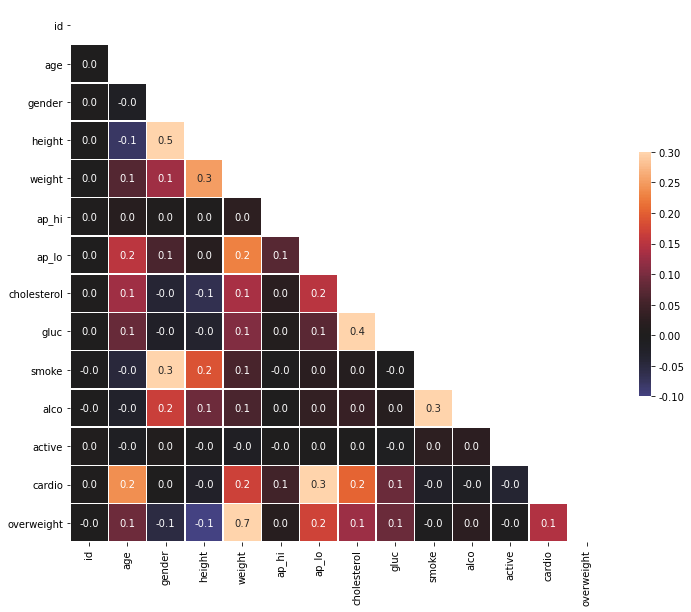

In [30]:
f, ax = plt.subplots(figsize=(12, 10))
ax = sns.heatmap(
        corr,
        linewidths=.5,
        annot=True,
        fmt='.1f',
        mask=mask,
        square=True,
        center=0,
        vmin=-0.1,
        vmax=0.3,
        cbar_kws={
            'shrink': .45,
            'format': '%.2f'
        })